In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('spotify-2023.csv',encoding='unicode_escape')
pd.set_option('display.max_columns',None)

In [ ]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,lyrics
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,Once upon a time you dressed so fine
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,People try to put us d-down
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,"What you need, do you know I got it?"
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,Come and love your daddy all night long
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,And the way the sunlight plays upon her hair


In [ ]:
data.nunique()

track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
streams                 949
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
lyrics                  197
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'lyrics'],
      dtype='object')

In [ ]:
data.drop(columns=['released_day','in_spotify_charts','in_apple_charts','in_deezer_charts','in_shazam_charts'],inplace=True)

In [ ]:
data.isnull().mean()*100

track_name               0.00000
artist(s)_name           0.00000
artist_count             0.00000
released_year            0.00000
released_month           0.00000
in_spotify_playlists     0.00000
streams                  0.00000
in_apple_playlists       0.00000
in_deezer_playlists      0.00000
bpm                      0.00000
key                      9.96852
mode                     0.00000
danceability_%           0.00000
valence_%                0.00000
energy_%                 0.00000
acousticness_%           0.00000
instrumentalness_%       0.00000
liveness_%               0.00000
speechiness_%            0.00000
lyrics                  71.35362
dtype: float64

In [ ]:
data['key'] = data['key'].fillna('No Record')

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.duplicated(subset='track_name').sum()

10

In [ ]:
data[data['track_name'].duplicated(keep=False)]

,track_name,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,lyrics
12,Flowers,Miley Cyrus,1,2023,1,12211,1316855716,300,745,118,No Record,Major,71,65,68,6,0,3,7,When I find myself in times of trouble
13,Daylight,David Kushner,1,2023,4,3528,387570742,80,182,130,D,Minor,51,32,43,83,0,9,3,In the day we sweat it out in the streets of a...
47,Die For You,The Weeknd,1,2016,11,2483,1647990401,68,24,134,C#,Minor,59,51,52,9,0,15,7,"The ice age is coming, the sun's zooming in"
178,SNAP,Rosa Linn,1,2022,3,3202,726307468,148,226,170,No Record,Major,56,53,64,11,0,45,6,I keep my eyes wide open all the time
331,Numb,Linkin Park,1,2003,3,20111,1361425037,39,"7,341",110,A,Major,50,24,86,0,0,64,4,NaN
335,Miss You,"Robin Schulz, Oliver Tree",2,2022,8,5730,497225336,108,197,145,F#,Minor,59,20,74,1,0,15,5,NaN
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,629,303216294,32,9,94,G#,Major,73,65,79,5,2,11,6,NaN
372,About Damn Time,Lizzo,1,2022,7,2332,723894473,0,25,109,A#,Minor,84,72,74,10,0,34,7,NaN
417,Die For You,Joji,1,2022,11,1703,246390068,38,36,148,G#,Major,47,15,52,38,13,29,5,NaN
448,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,1,1959,11,6512,446390129,88,277,134,C#,Major,45,72,24,91,0,18,4,NaN


In [ ]:
data.nunique()

track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
in_spotify_playlists    879
streams                 949
in_apple_playlists      234
in_deezer_playlists     348
bpm                     124
key                      12
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
lyrics                  197
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0
danceability_%,953.0,66.969570,14.630610,23.0,57.0,69.0,78.0,96.0
valence_%,953.0,51.431270,23.480632,4.0,32.0,51.0,70.0,97.0
energy_%,953.0,64.279119,16.550526,9.0,53.0,66.0,77.0,97.0
acousticness_%,953.0,27.057712,25.996077,0.0,6.0,18.0,43.0,97.0


In [ ]:
Released_year = data.released_year.value_counts().reset_index()

In [ ]:
Released_year.sort_values

<bound method DataFrame.sort_values of     index  released_year
0    2022            402
1    2023            175
2    2021            119
3    2020             37
4    2019             36
5    2017             23
6    2016             18
7    2014             13
8    2013             13
9    2015             11
10   2018             10
11   2012             10
12   2011             10
13   2010              7
14   2002              6
15   1999              5
16   1984              4
17   2000              4
18   2004              4
19   1963              3
20   1958              3
21   1995              2
22   1970              2
23   1959              2
24   1985              2
25   1957              2
26   1986              2
27   2003              2
28   1991              2
29   2008              2
30   1975              2
31   1982              2
32   1946              1
33   2005              1
34   1942              1
35   1996              1
36   1998              1
37   1950  

In [ ]:
data['released_month']

0       7
1       3
2       6
3       8
4       5
       ..
948    11
949    10
950    11
951    10
952    11
Name: released_month, Length: 953, dtype: int64

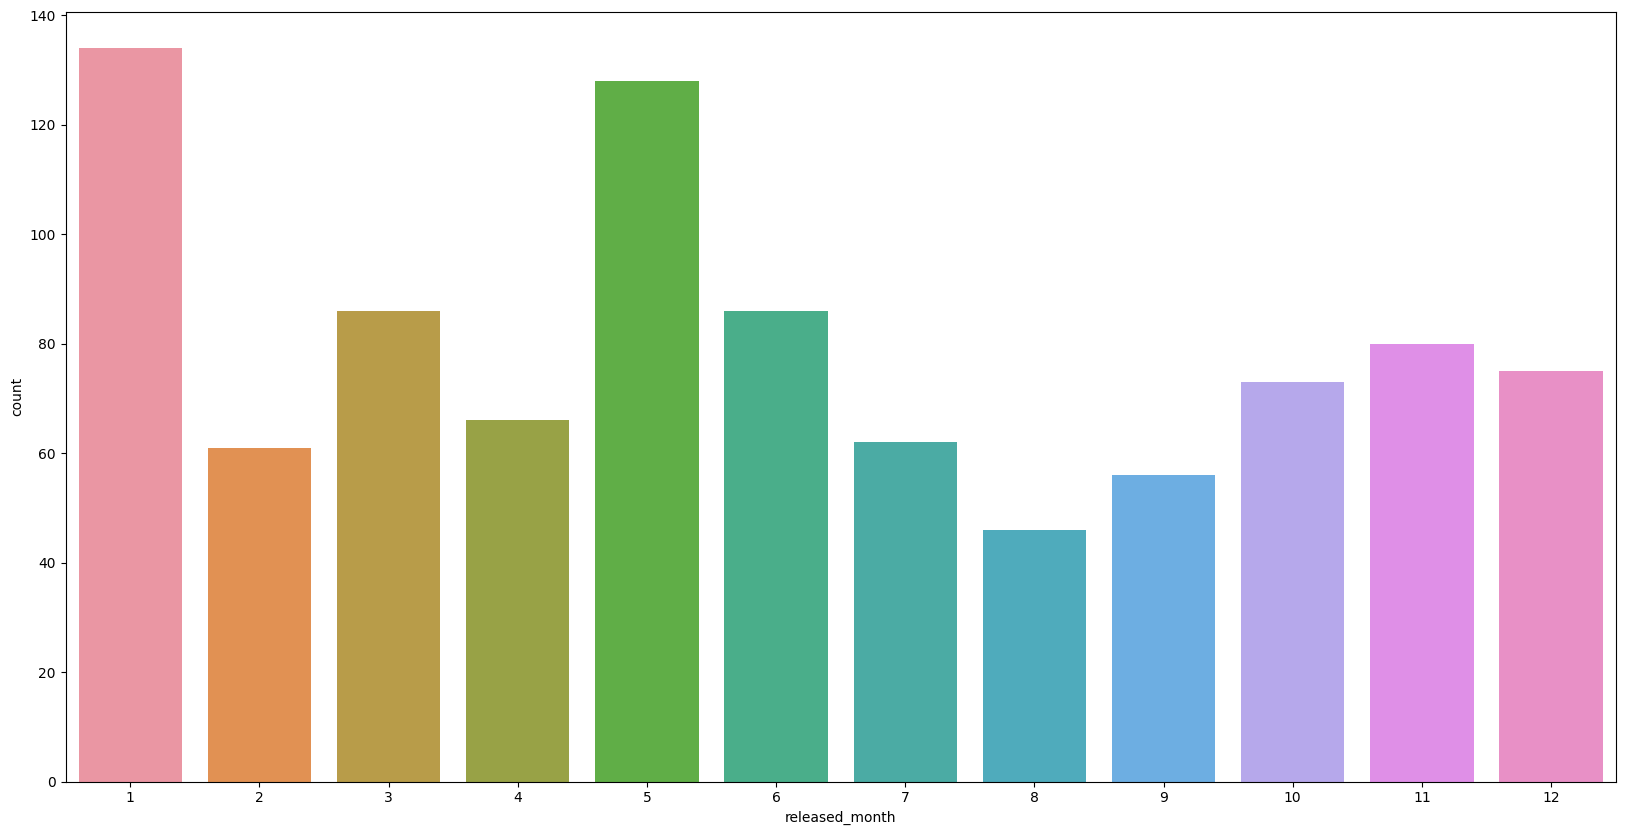

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="released_month"),;
plt.savefig('image1.png')

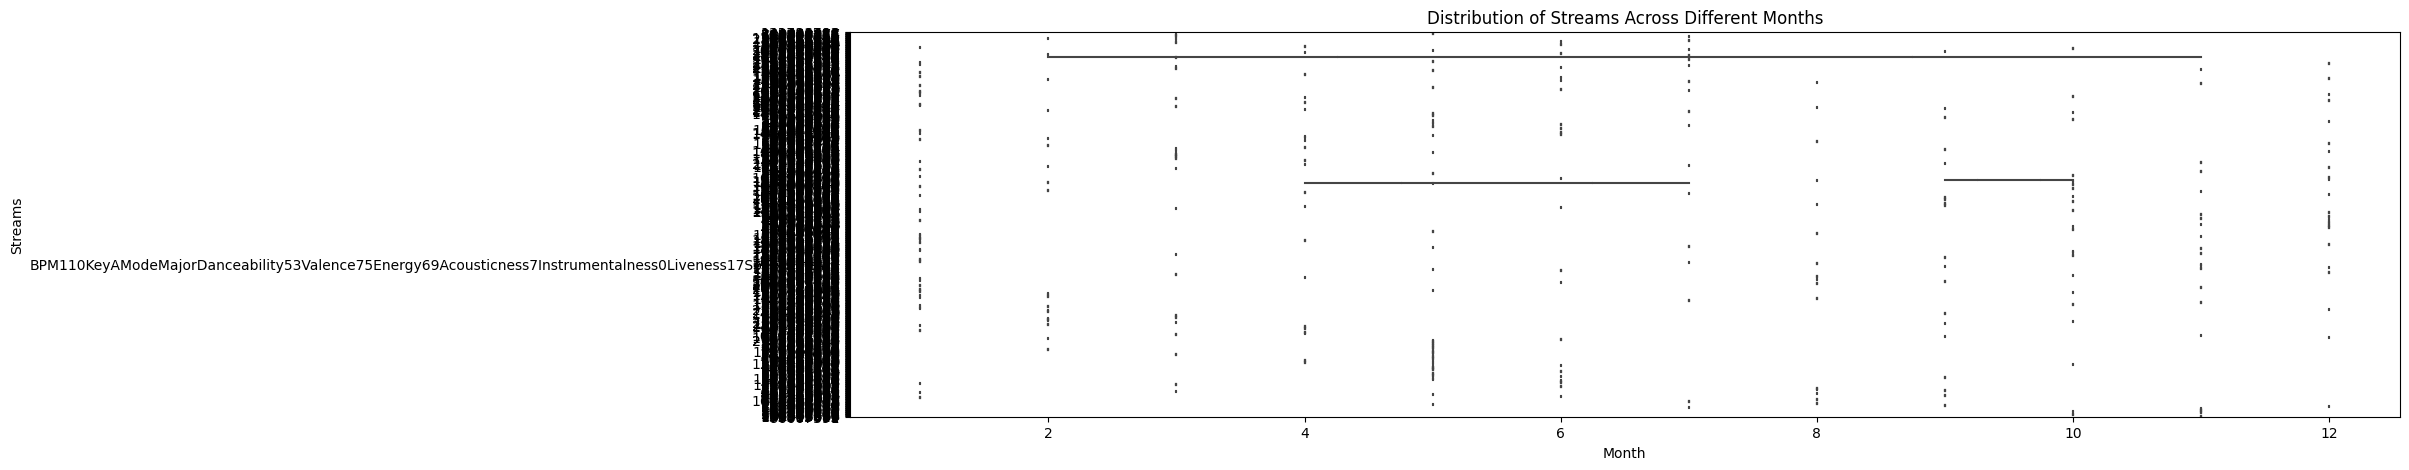

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='released_month', y='streams', data=data)
plt.title('Distribution of Streams Across Different Months')
plt.xlabel('Month')
plt.ylabel('Streams')
plt.show();
plt.savefig('image00.png')

In [ ]:
artist_nsong = data['artist(s)_name'].value_counts()

In [ ]:
artist_nsong.head(1)

Taylor Swift    34
Name: artist(s)_name, dtype: int64

In [ ]:
song_streamh = data[['track_name','artist(s)_name','released_year','streams']].\
               sort_values(by = 'streams',ascending=False)

In [ ]:
song_streamh.head(1)

,track_name,artist(s)_name,released_year,streams
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1970,BPM110KeyAModeMajorDanceability53Valence75Ener...


In [ ]:
song_streamh.tail(1)

,track_name,artist(s)_name,released_year,streams
301,"Arcï¿½ï¿½ngel: Bzrp Music Sessions, Vol","Arcangel, Bizarrap",2023,100409613


In [ ]:
artist_nsong10 = artist_nsong.head(10)

In [ ]:
artist_nsong10

Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: artist(s)_name, dtype: int64

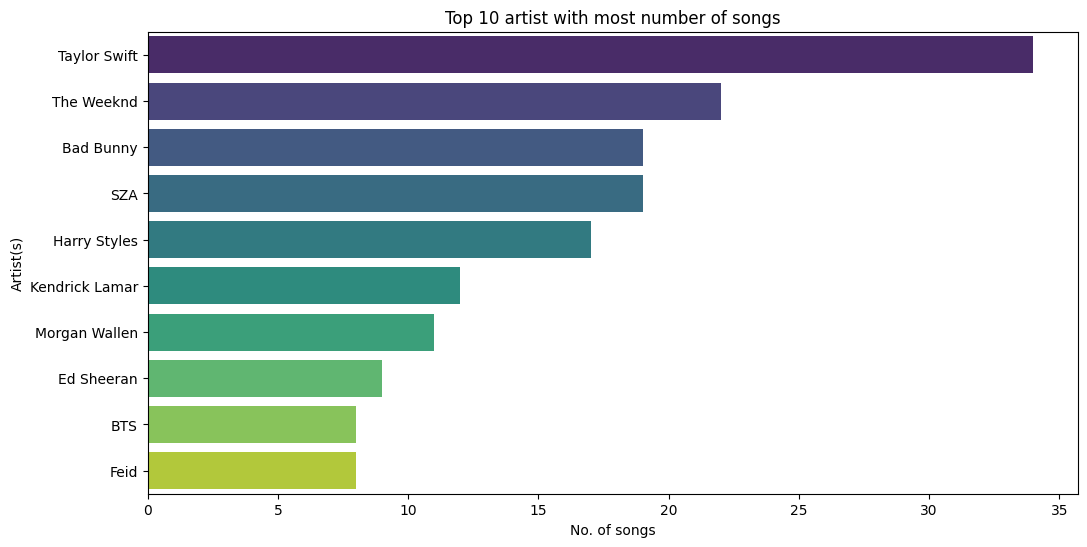

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=artist_nsong10.values,y=artist_nsong10.index,palette='viridis')
plt.xlabel('No. of songs')
plt.ylabel('Artist(s)')
plt.title('Top 10 artist with most number of songs')
plt.show;
plt.savefig('image2.png')

In [ ]:
song_streamh10 = song_streamh.head(10)

In [ ]:
song_streamh10.sort_values

<bound method DataFrame.sort_values of                                 track_name                 artist(s)_name  \
574    Love Grows (Where My Rosemary Goes)              Edison Lighthouse   
33                               Anti-Hero                   Taylor Swift   
625                                 Arcade                Duncan Laurence   
253                          Glimpse of Us                           Joji   
455                         Seek & Destroy                            SZA   
98                      Summertime Sadness                   Lana Del Rey   
891  Come Back Home - From "Purple Hearts"                   Sofia Carson   
427                      Where Are You Now  Lost Frequencies, Calum Scott   
322                          I Love You So                    The Walters   
130                              Queencard                       (G)I-DLE   

     released_year                                            streams  
574           1970  BPM110KeyAModeMajorDa

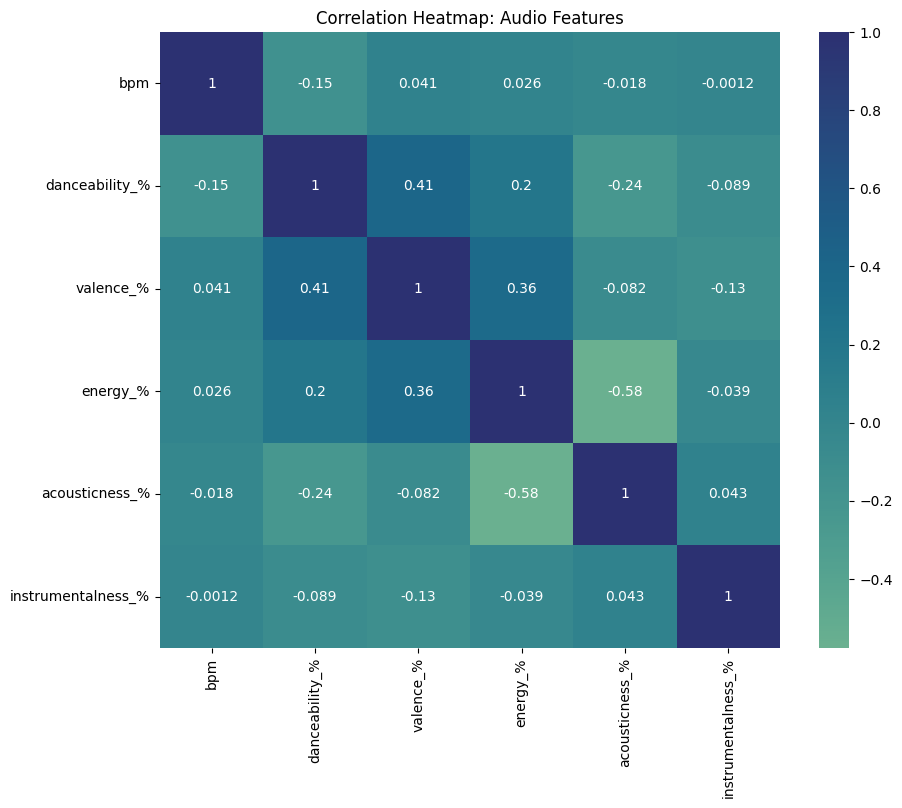

In [ ]:
audio_features_columns = ['bpm','danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%']

correlation_matrix = data[audio_features_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', center=0)
plt.title('Correlation Heatmap: Audio Features')
plt.savefig('image134.png')
plt.show();


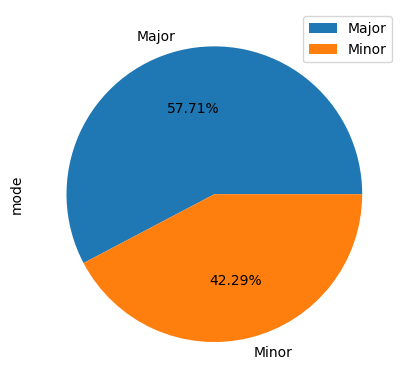

In [ ]:
data['mode'].value_counts().plot.pie(autopct = '%1.2f%%', legend = True);

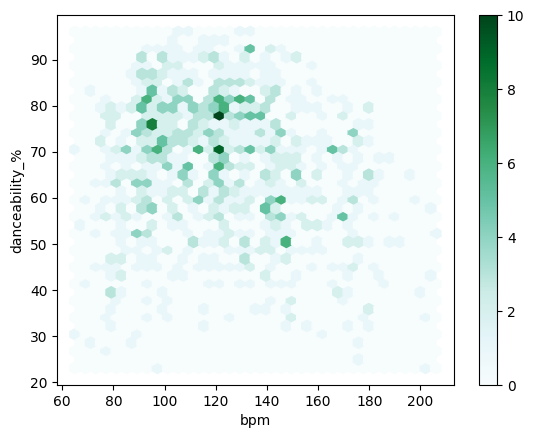

In [ ]:
data.plot.hexbin('bpm','danceability_%',gridsize=35);
plt.savefig('image136.png')
plt.show();


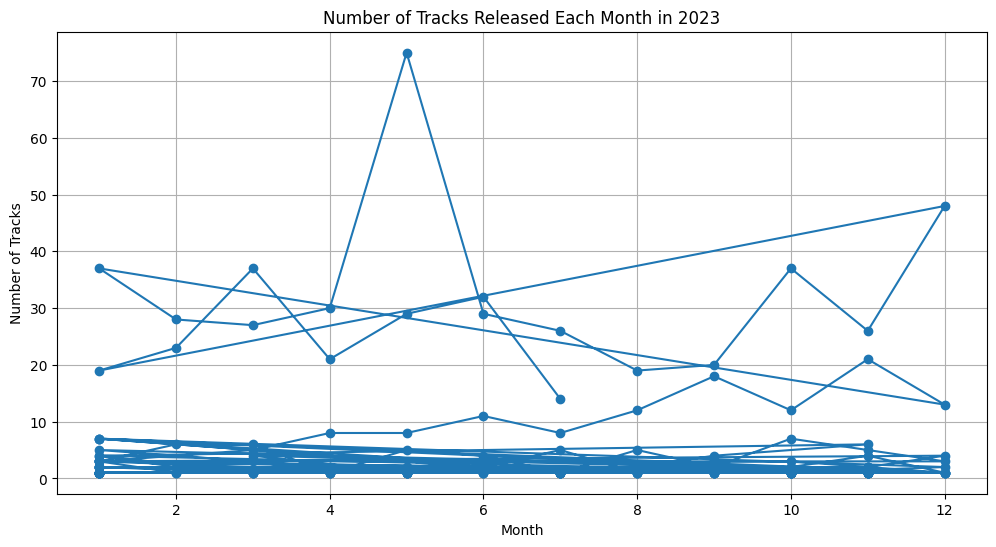

In [ ]:
monthly_track_counts = data.groupby(['released_year', 'released_month'])['track_name'].count().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_track_counts['released_month'], monthly_track_counts['track_name'], marker='o', linestyle='-')
plt.title('Number of Tracks Released Each Month in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.grid(True)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.savefig('image137.png')

plt.show();

In [ ]:
# Assuming 'artist(s)_name' is the column containing artist names
# Group the data by artist and count the number of tracks for each artist
artist_track_counts = data['artist(s)_name'].value_counts().reset_index()
artist_track_counts.columns = ['Artist', 'Track Count']

# Sort the data by track count in descending order to get the top artists
artist_track_counts = artist_track_counts.sort_values(by='Track Count', ascending=False)

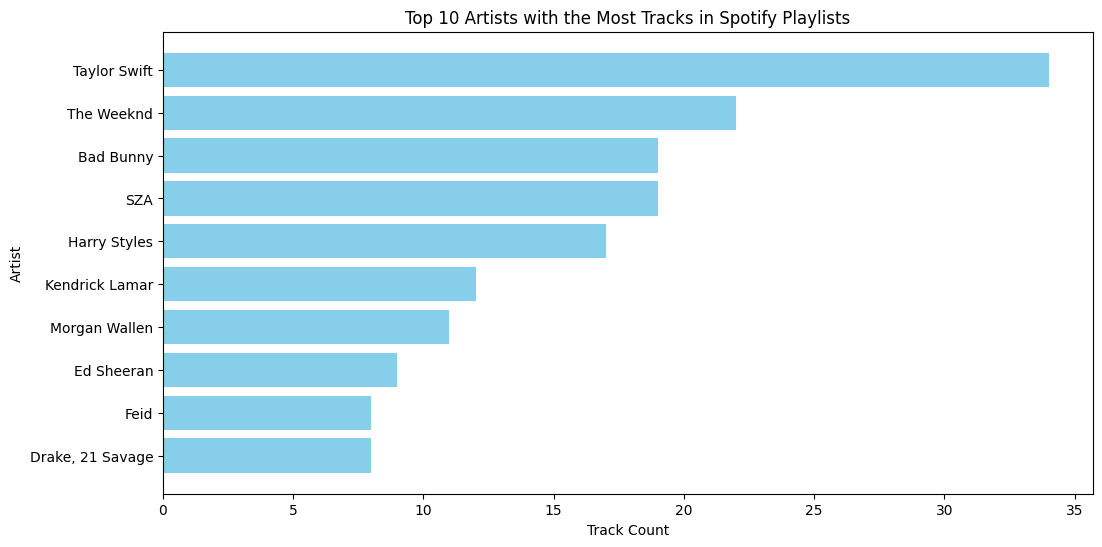

In [ ]:
# Set the number of top artists you want to visualize (e.g., top 10)
top_n = 10

# Select the top artists and their track counts
top_artists = artist_track_counts.head(top_n)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_artists['Artist'], top_artists['Track Count'], color='skyblue')
plt.xlabel('Track Count')
plt.ylabel('Artist')
plt.title(f'Top {top_n} Artists with the Most Tracks in Spotify Playlists')
plt.gca().invert_yaxis()  # Invert the y-axis to display the artist with the most tracks at the top
plt.savefig('image138.png')
plt.show()

In [ ]:
# Assuming 'released_month' and 'streams' are the relevant columns
# Filter out rows with missing data in these columns
spotify_data_filtered = data.dropna(subset=['released_month', 'streams'])

# Convert 'released_month' to numeric if it's in string format
# This assumes that the month is represented as a numeric value (e.g., 1 for January)
spotify_data_filtered['released_month'] = pd.to_numeric(spotify_data_filtered['released_month'])

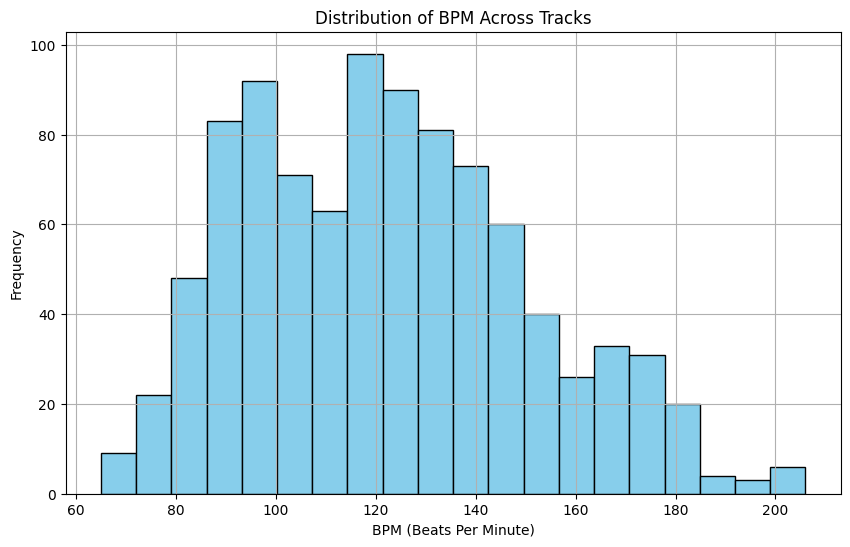

In [ ]:
# Assuming 'bpm' is the column containing BPM data
bpm_data = data['bpm']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(bpm_data, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('BPM (Beats Per Minute)')
plt.ylabel('Frequency')
plt.title('Distribution of BPM Across Tracks')
plt.grid(True)
plt.savefig('image140.png')
plt.show()

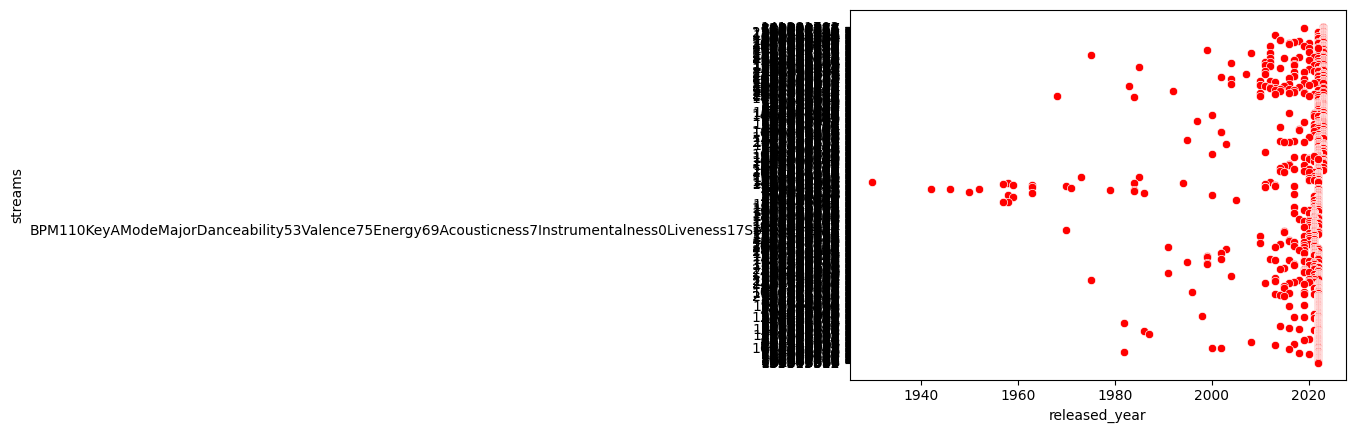

In [ ]:
sns.scatterplot(y='streams',x='released_year',data=data,color='red');
plt.savefig('image141.png')
plt.show()

In [ ]:
# Assuming 'instrumentalness' and 'in_spotify_charts' are the relevant columns
# Filter out rows with missing data in these columns
spotify_data_filtered = data.dropna(subset=['instrumentalness_%', 'in_spotify_playlists'])

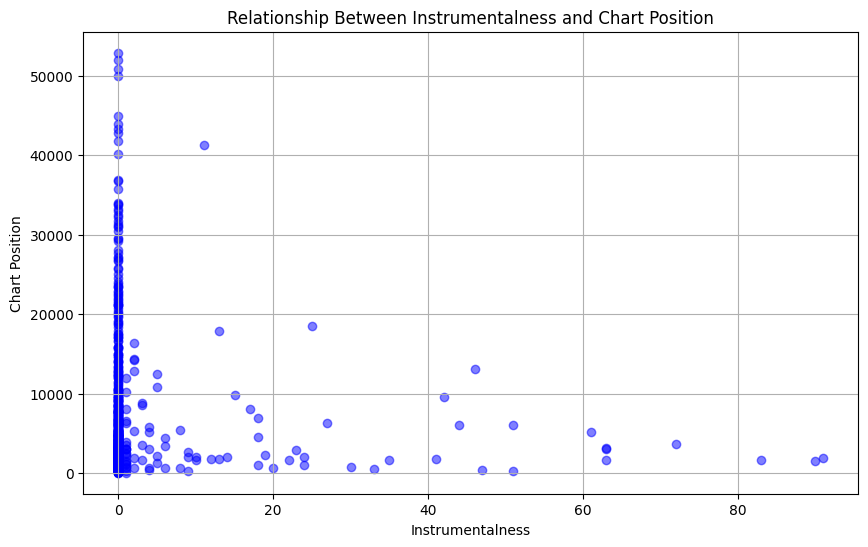

In [ ]:
# Assuming 'instrumentalness' is on a scale from 0 to 1, where 0 is not instrumental and 1 is completely instrumental
instrumentalness_data = spotify_data_filtered['instrumentalness_%']
chart_positions_data = spotify_data_filtered['in_spotify_playlists']

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(instrumentalness_data, chart_positions_data, alpha=0.5, c='blue')
plt.xlabel('Instrumentalness')
plt.ylabel('Chart Position')
plt.title('Relationship Between Instrumentalness and Chart Position')
plt.grid(True)
plt.savefig('image142.png')
plt.show()

In [ ]:
# Assuming 'energy_' and 'acousticness_' are the relevant columns
# Filter out rows with missing data in these columns
spotify_data_filtered = data.dropna(subset=['energy_%', 'acousticness_%'])

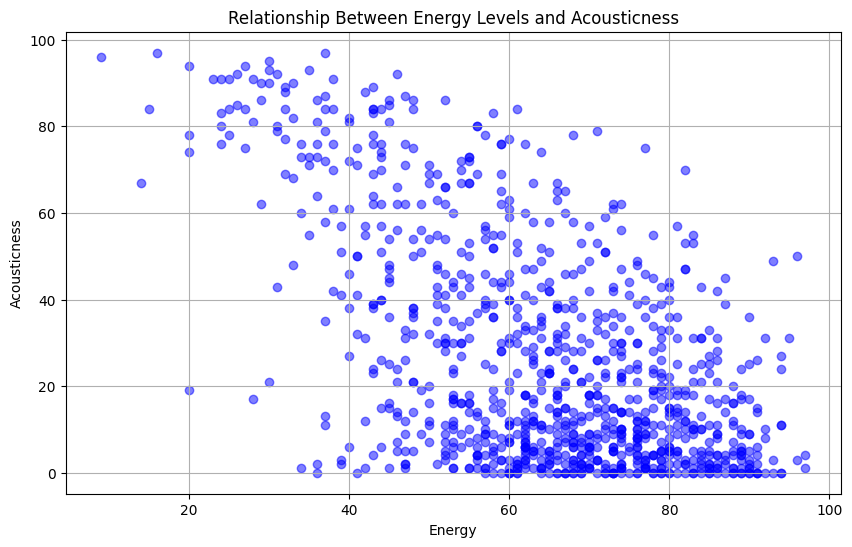

In [ ]:
# Assuming 'energy_' and 'acousticness_' are on a scale from 0 to 1
energy_data = spotify_data_filtered['energy_%']
acousticness_data = spotify_data_filtered['acousticness_%']

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(energy_data, acousticness_data, alpha=0.5, c='blue')
plt.xlabel('Energy')
plt.ylabel('Acousticness')
plt.title('Relationship Between Energy Levels and Acousticness')
plt.grid(True)
plt.savefig('image143.png')
plt.show()

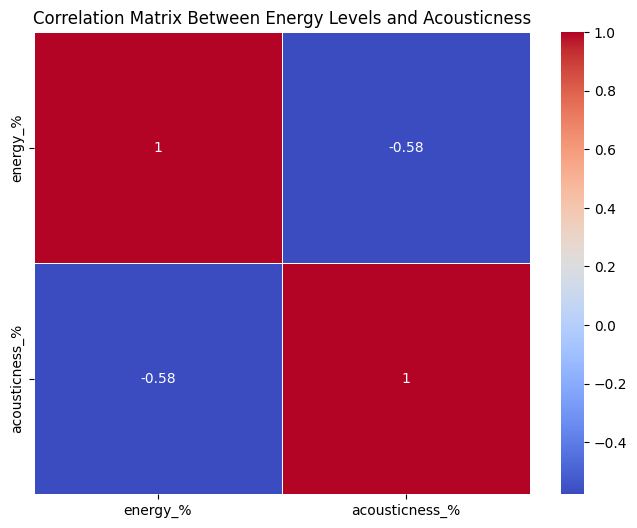

In [ ]:
# Create a DataFrame with the selected columns
correlation_data = spotify_data_filtered[['energy_%', 'acousticness_%']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Between Energy Levels and Acousticness')
plt.savefig('image144.png')
plt.show()

In [ ]:
# Assuming these are the relevant columns
# Filter out rows with missing data in these columns
spotify_data_filtered = data.dropna(subset=['key', 'mode', 'danceability_%', 'valence_%'])

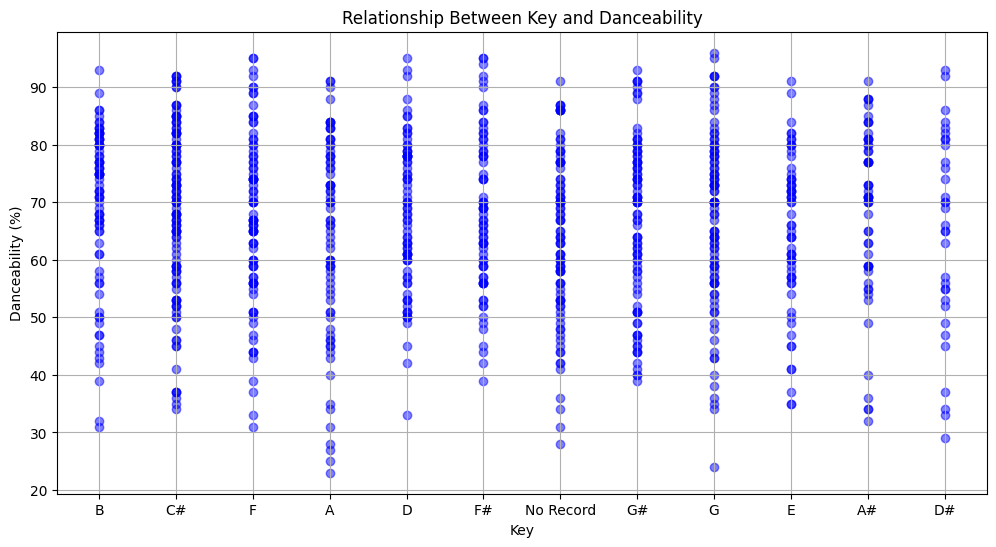

In [ ]:
# Assuming 'key' is categorical and 'danceability_%' is a continuous variable
key_data = spotify_data_filtered['key']
danceability_data = spotify_data_filtered['danceability_%']

# Create a scatterplot for danceability by key
plt.figure(figsize=(12, 6))
plt.scatter(key_data, danceability_data, alpha=0.5, c='blue')
plt.xlabel('Key')
plt.ylabel('Danceability (%)')
plt.title('Relationship Between Key and Danceability')
plt.grid(True)
plt.savefig('image145.png')
plt.show()

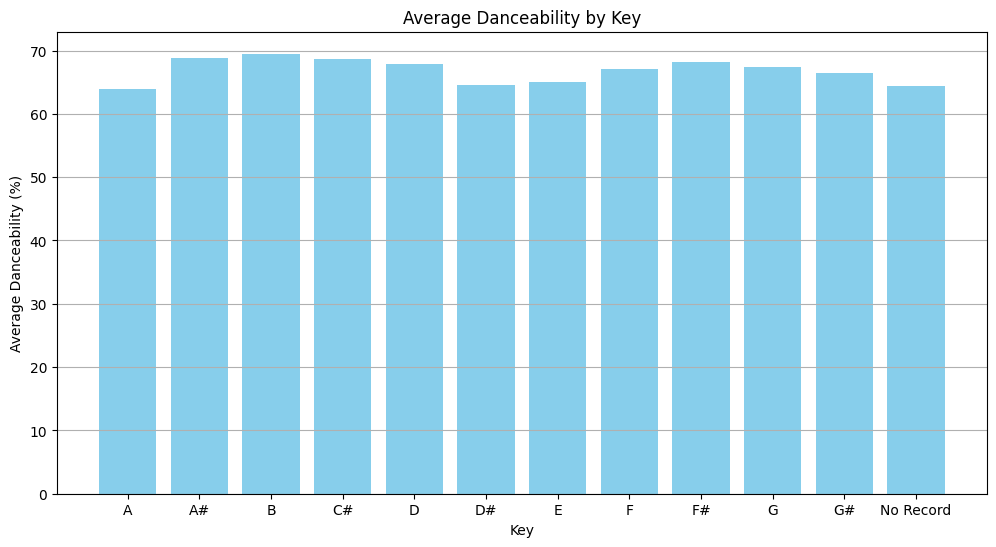

In [ ]:
# Group the data by key and calculate the mean danceability for each key
key_danceability_means = spotify_data_filtered.groupby('key')['danceability_%'].mean().reset_index()

# Assuming there are 12 keys (0 to 11)
keys = np.arange(12)
danceability_means = key_danceability_means['danceability_%']

# Create the grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(keys, danceability_means, tick_label=key_danceability_means['key'], color='skyblue')
plt.xlabel('Key')
plt.ylabel('Average Danceability (%)')
plt.title('Average Danceability by Key')
plt.xticks(keys, key_danceability_means['key'])
plt.grid(axis='y')
plt.savefig('image146.png')
plt.show()

In [ ]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'in_spotify_playlists', 'streams',
       'in_apple_playlists', 'in_deezer_playlists', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

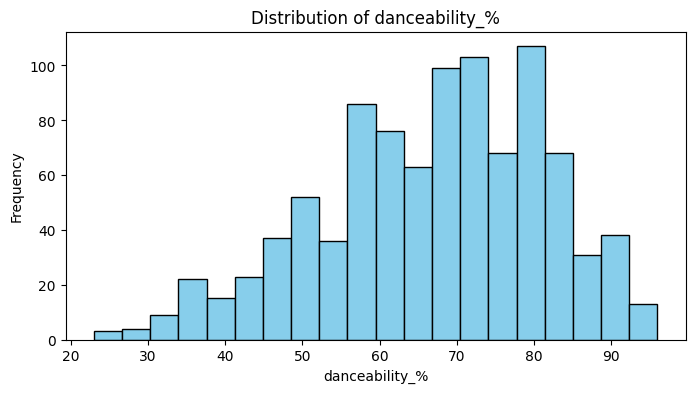

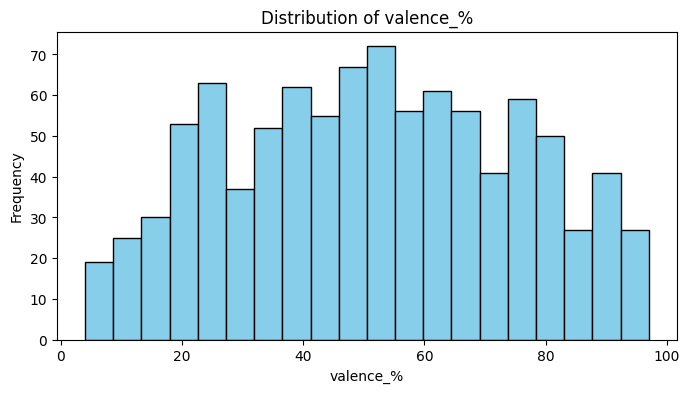

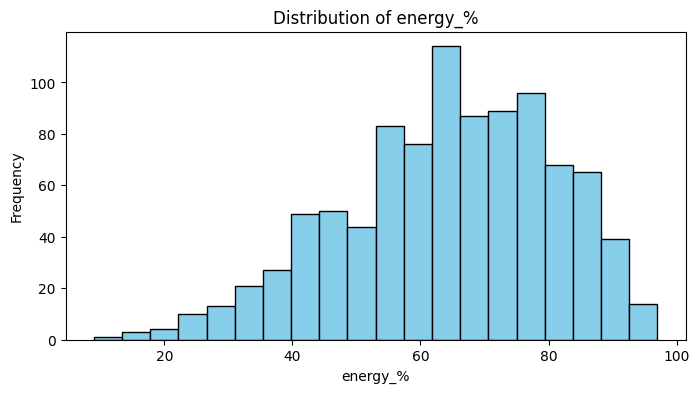

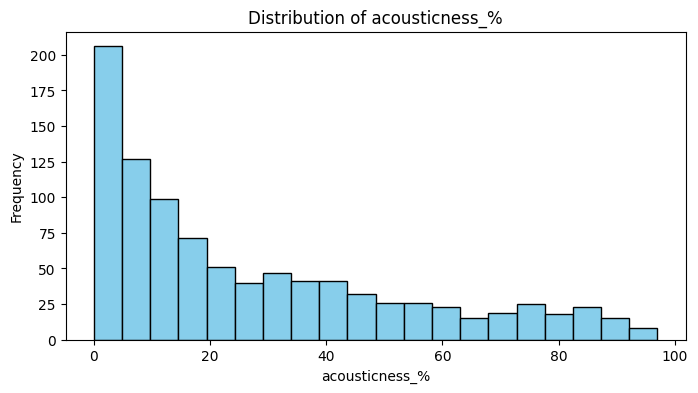

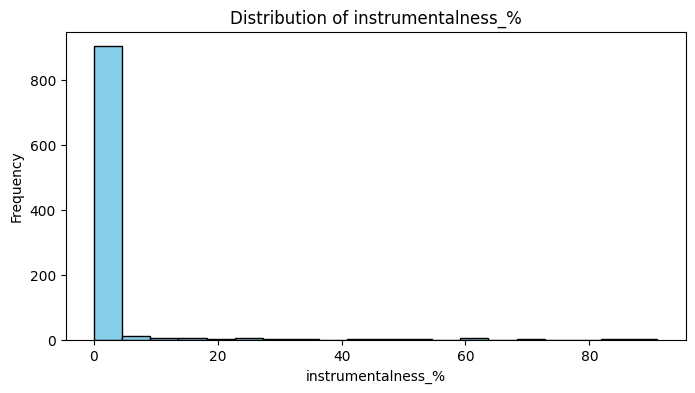

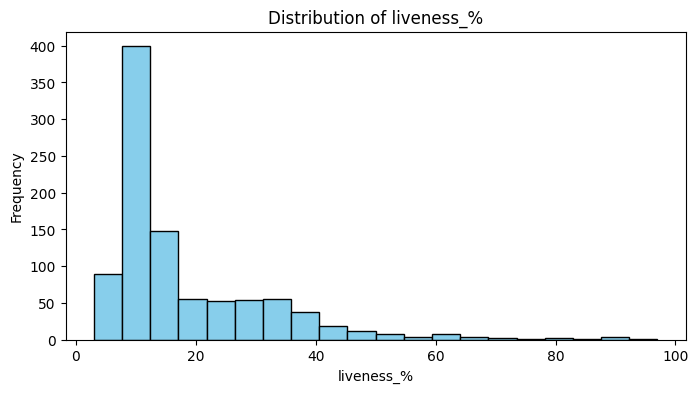

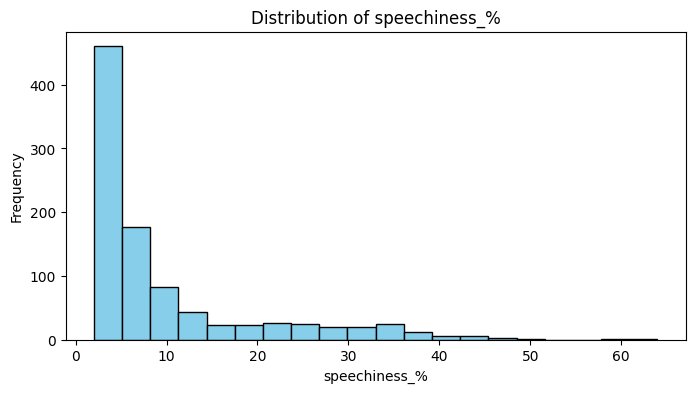

<Figure size 1000x800 with 0 Axes>

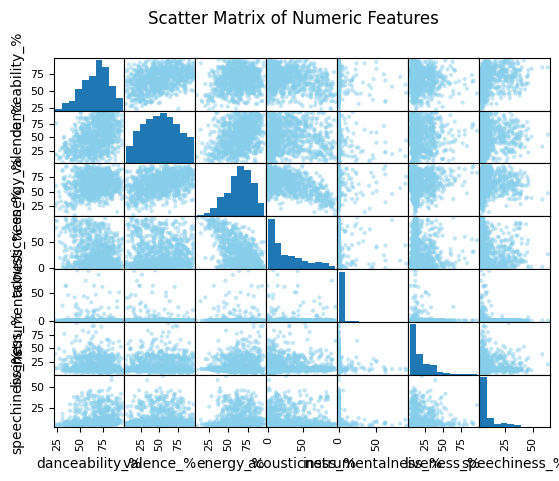

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your Spotify dataset
data = pd.read_csv('spotify-2023.csv',encoding='unicode_escape')

# Explore the distribution of audio features
numeric_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Summary statistics
summary_stats = data[numeric_features].describe()

# Create histograms for each numeric feature
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    plt.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Create scatter plots to visualize relationships between features
plt.figure(figsize=(10, 8))
pd.plotting.scatter_matrix(data[numeric_features], diagonal='hist', alpha=0.5, color='skyblue')
plt.suptitle('Scatter Matrix of Numeric Features')
plt.savefig('image147.png')
plt.show()


In [ ]:


# Select numeric columns for which you want to calculate summary statistics
numeric_columns = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Calculate summary statistics
summary_statistics = data[numeric_columns].describe()

# Display the summary statistics
print(summary_statistics)


       danceability_%   valence_%    energy_%  acousticness_%  \
count       953.00000  953.000000  953.000000      953.000000   
mean         66.96957   51.431270   64.279119       27.057712   
std          14.63061   23.480632   16.550526       25.996077   
min          23.00000    4.000000    9.000000        0.000000   
25%          57.00000   32.000000   53.000000        6.000000   
50%          69.00000   51.000000   66.000000       18.000000   
75%          78.00000   70.000000   77.000000       43.000000   
max          96.00000   97.000000   97.000000       97.000000   

       instrumentalness_%  liveness_%  speechiness_%  
count          953.000000  953.000000     953.000000  
mean             1.581322   18.213012      10.131165  
std              8.409800   13.711223       9.912888  
min              0.000000    3.000000       2.000000  
25%              0.000000   10.000000       4.000000  
50%              0.000000   12.000000       6.000000  
75%              0.000000   2

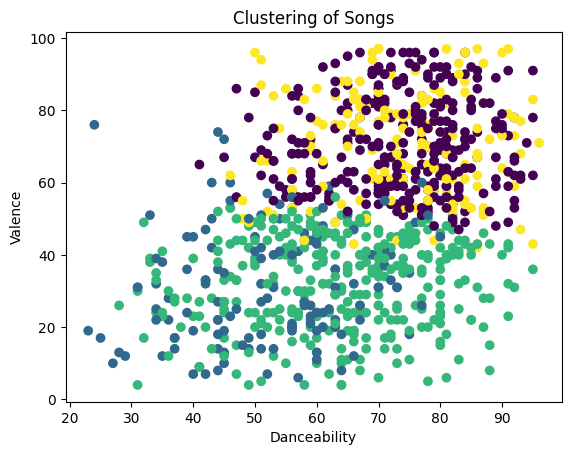

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv('spotify-2023.csv',encoding='unicode_escape')

# Select the audio features for clustering
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%']

# Prepare the data for clustering
X = data[features]

# Choose the number of clusters (you can adjust this)
n_clusters = 4

# Create a KMeans clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to your data
kmeans.fit(X)

# Add cluster labels to the dataset
data['cluster'] = kmeans.labels_

# Visualize the clusters (for 2D visualization)
plt.scatter(X['danceability_%'], X['valence_%'], c=data['cluster'], cmap='viridis')
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.title('Clustering of Songs')
plt.savefig('image148.png')
plt.show()

# To visualize clusters based on other feature combinations, adjust the scatter plot accordingly


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your Spotify dataset
data = pd.read_csv('spotify-2023.csv',encoding='unicode_escape')

# Handling missing data: Remove rows with missing values
data.dropna(inplace=True)

# Data type conversion: Convert 'release_date' to datetime
data['released_day'] = pd.to_datetime(data['released_day'])

# Feature scaling: Standardize numeric features
scaler = StandardScaler()
numeric_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Check if 'Genre' column exists before encoding
if 'Genre' in data.columns:
    # Encoding categorical variables: One-hot encoding for 'Genre'
    data = pd.get_dummies(data, columns=['Genre'], prefix='Genre', drop_first=True)

# Feature selection: Select a subset of relevant features
selected_features = ['danceability_%', 'valence_%', 'energy_%']
data = data[selected_features]

# Save the preprocessed dataset to a new CSV file
data.to_csv("preprocessed_spotify_data.csv", index=False)


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Load your Spotify dataset
data = pd.read_csv('spotify-2023.csv', encoding='unicode_escape')

# Assuming you have a 'lyrics' column containing song lyrics or text data
# Replace 'lyrics' with the actual column name containing text data in your dataset.

# Ensure the 'lyrics' column contains strings and handle any missing values
data['lyrics'] = data['lyrics'].fillna('')  # Fill missing values with an empty string
data['lyrics'] = data['lyrics'].astype(str)  # Ensure all values are strings

# Convert text data to lowercase
data['lyrics'] = data['lyrics'].str.lower()

# Tokenize the text data into words
nltk.download('punkt')
data['lyrics'] = data['lyrics'].apply(word_tokenize)

# Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['lyrics'] = data['lyrics'].apply(lambda words: [word for word in words if word not in stop_words])

# Flatten the list of words
data['lyrics'] = data['lyrics'].apply(lambda words: ' '.join(words))

# Compute word frequency distribution
word_freq = FreqDist(data['lyrics'].str.split().sum())

# Display the most common words
print(word_freq.most_common(10))


[(',', 105), ("n't", 35), ('baby', 27), ('.', 25), ("'s", 22), ("'", 22), ('?', 21), ('oh', 18), ('help', 17), ("'ll", 15)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pip install wordcloud


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


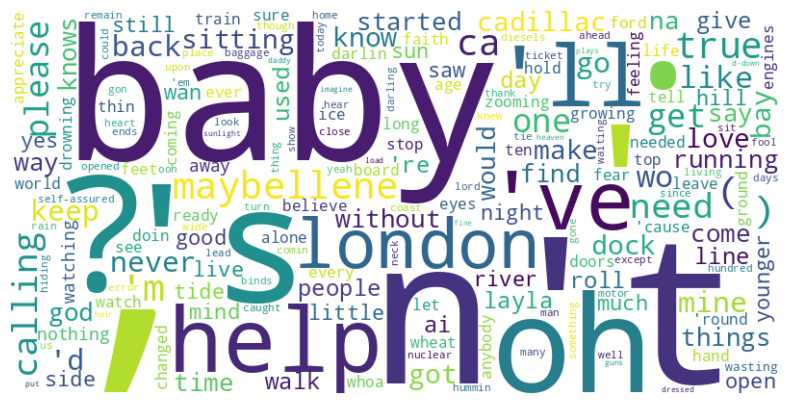

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your Spotify dataset
data = pd.read_csv('spotify-2023.csv', encoding='unicode_escape')

# Assuming you have a 'lyrics' column containing song lyrics or text data
# Replace 'lyrics' with the actual column name containing text data in your dataset.

# Ensure the 'lyrics' column contains strings and handle any missing values
data['lyrics'] = data['lyrics'].fillna('')  # Fill missing values with an empty string
data['lyrics'] = data['lyrics'].astype(str)  # Ensure all values are strings

# Convert text data to lowercase
data['lyrics'] = data['lyrics'].str.lower()

# Tokenize the text data into words
nltk.download('punkt')
data['lyrics'] = data['lyrics'].apply(word_tokenize)

# Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['lyrics'] = data['lyrics'].apply(lambda words: [word for word in words if word not in stop_words])

# Flatten the list of words
data['lyrics'] = data['lyrics'].apply(lambda words: ' '.join(words))

# Compute word frequency distribution
word_freq = FreqDist(data['lyrics'].str.split().sum())

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('image149.png')
plt.show()


In [ ]:
pip install plotly


In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('spotify-2023.csv', encoding='unicode_escape')


In [ ]:
import plotly.express as px

# Load the sample dataset from Plotly Express
df = px.data.iris()

# Create a scatter plot
fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species',
                 size='petal_length', hover_data=['petal_width'],
                 labels={'sepal_width': 'Sepal Width', 'sepal_length': 'Sepal Length'},
                 title='Iris Dataset: Sepal Width vs. Sepal Length')

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='Sepal Width',
    yaxis_title='Sepal Length',
    legend_title='Species',
    font=dict(family='Arial', size=12),
    template='plotly_white'
)

# Show the plot
fig.show()



<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


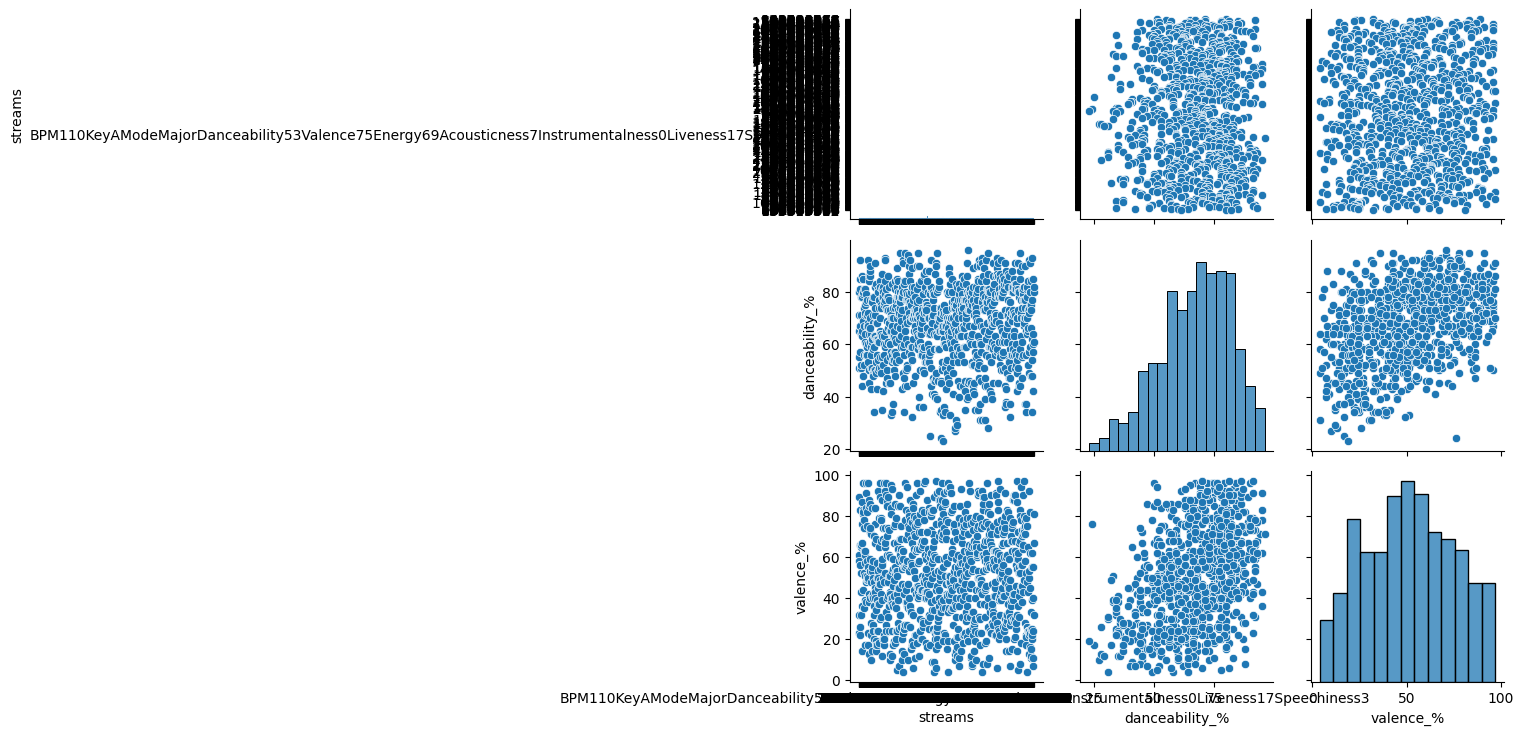

       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000          

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('spotify-2023.csv', encoding='unicode_escape')

# Example EDA visualizations
sns.pairplot(df, vars=['streams', 'danceability_%', 'valence_%'])
plt.show()

# Example summary statistics
summary_stats = df.describe()
print(summary_stats)


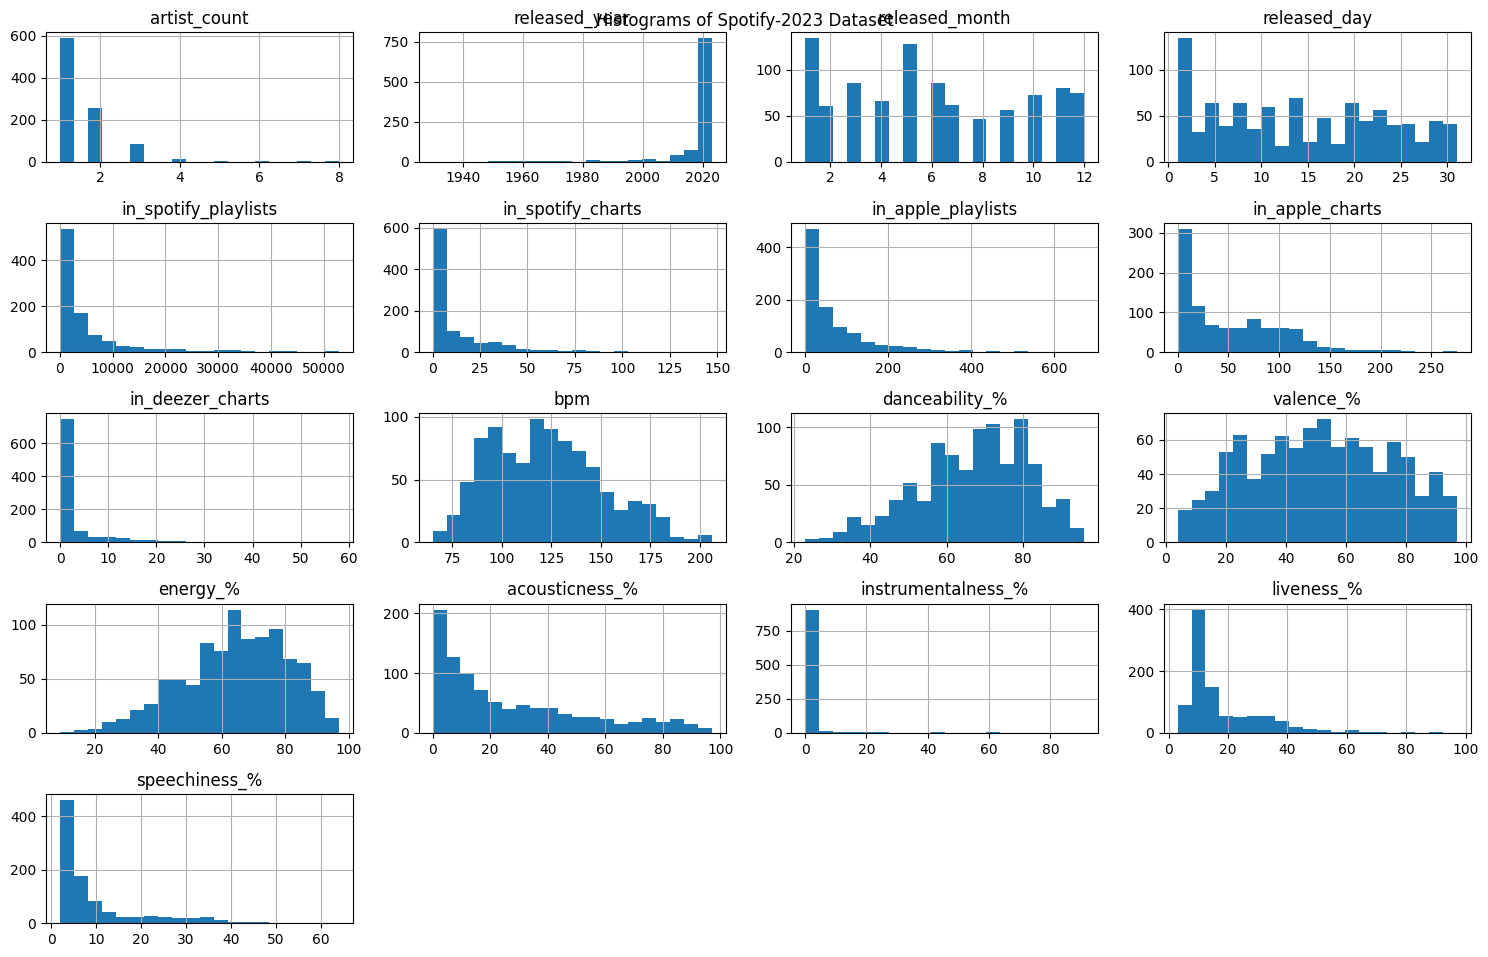

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('spotify-2023.csv',encoding='unicode_escape')

# Plot histograms for all columns
data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Spotify-2023 Dataset', y=0.95)
plt.tight_layout()
plt.show()


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.0f}'.format

In [ ]:
data = pd.read_csv('spotify-2023.csv',encoding='unicode_escape')
spotify=pd.DataFrame(data)
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,lyrics
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,Once upon a time you dressed so fine
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,People try to put us d-down
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,"What you need, do you know I got it?"
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,Come and love your daddy all night long
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,And the way the sunlight plays upon her hair


In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
columns =['artist_count','in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm','danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%','released_year']
spotify[columns] = spotify[columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
spotify.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month',
       'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts',
       'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'lyrics'],
      dtype='object')

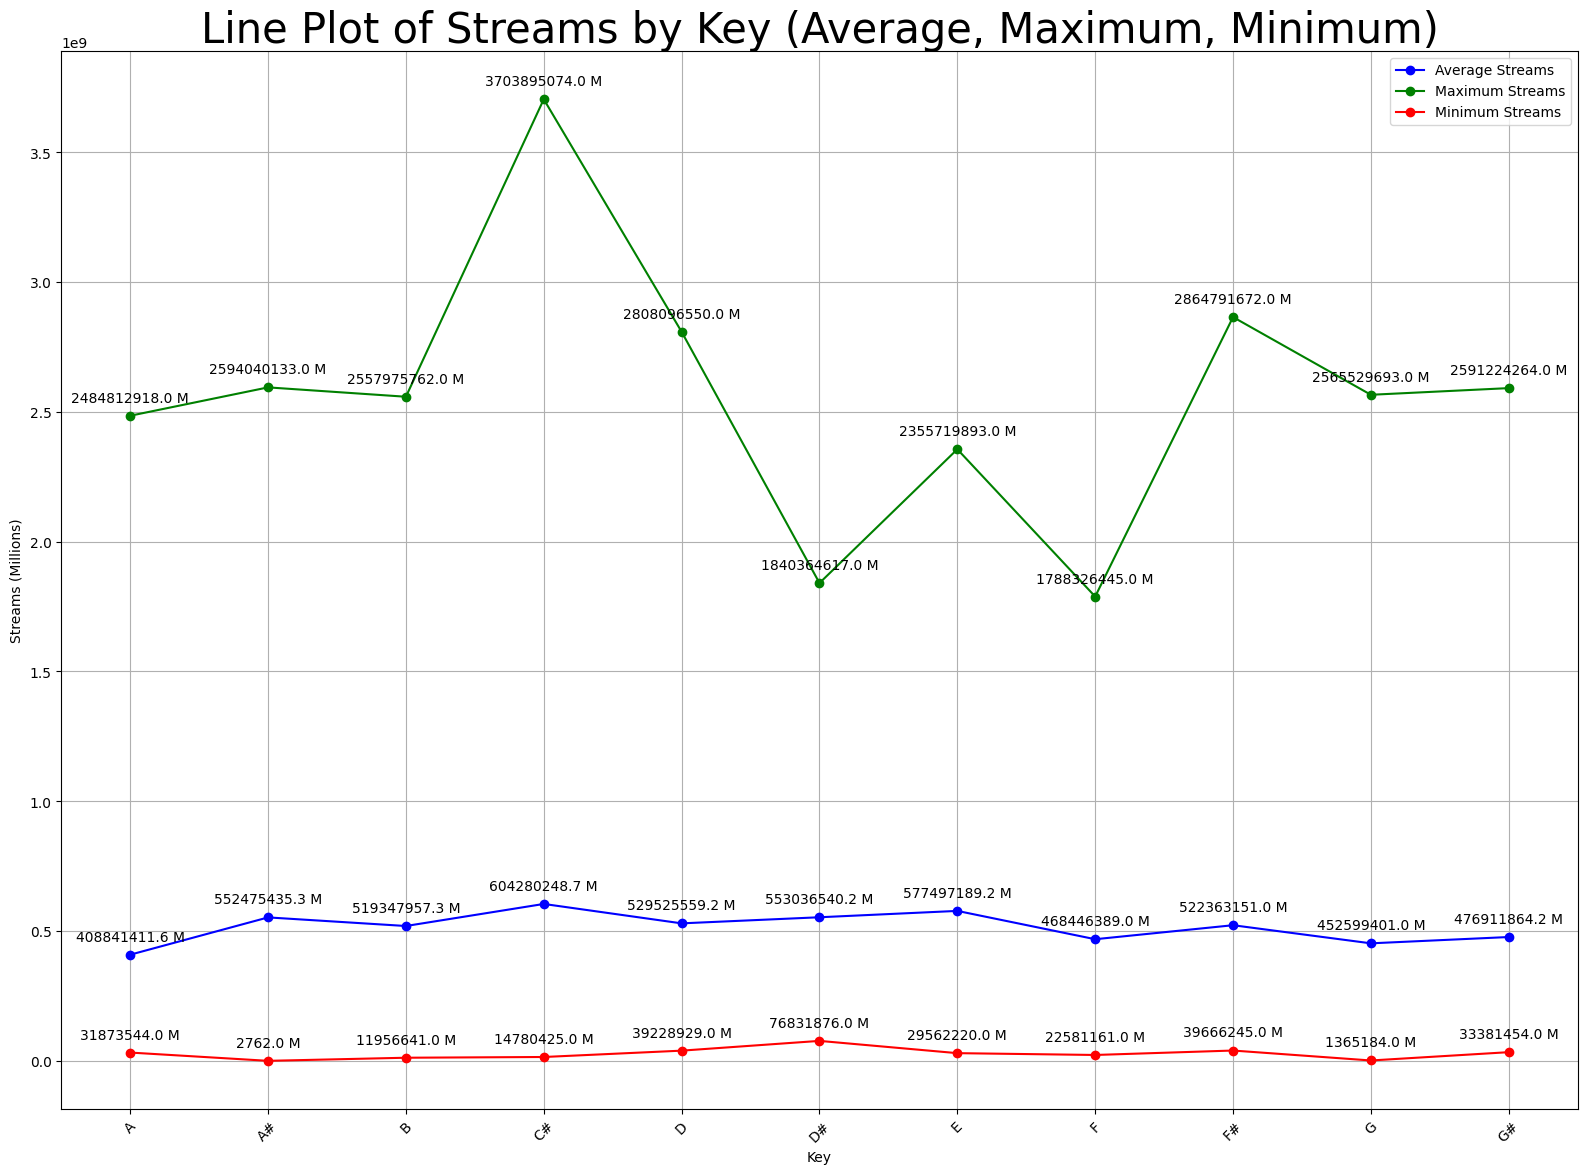

In [ ]:
import matplotlib.pyplot as plt

# Group by 'key' and calculate average, maximum, and minimum streams
avg_streams = spotify.groupby('key')['streams'].mean()
max_streams = spotify.groupby('key')['streams'].max()
min_streams = spotify.groupby('key')['streams'].min()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 12))

# Plot average streams as a line plot with data labels and blue color
ax.plot(avg_streams.index, avg_streams.values, marker='o', color='blue', label='Average Streams')
for x, y in zip(avg_streams.index, avg_streams.values):
    ax.annotate(f'{y:.1f} M', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Plot maximum streams as a line plot with data labels and green color
ax.plot(max_streams.index, max_streams.values, marker='o', color='green', label='Maximum Streams')
for x, y in zip(max_streams.index, max_streams.values):
    ax.annotate(f'{y:.1f} M', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Plot minimum streams as a line plot with data labels and red color
ax.plot(min_streams.index, min_streams.values, marker='o', color='red', label='Minimum Streams')
for x, y in zip(min_streams.index, min_streams.values):
    ax.annotate(f'{y:.1f} M', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Set labels and title
ax.set_xlabel('Key')
ax.set_ylabel('Streams (Millions)')
ax.set_title('Line Plot of Streams by Key (Average, Maximum, Minimum)',fontsize=30)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid for better visualization
plt.grid(True)

# Ensure a tight layout
plt.tight_layout()

# Add a legend
ax.legend()

# Show the plot
plt.savefig('image160.png')
plt.show()

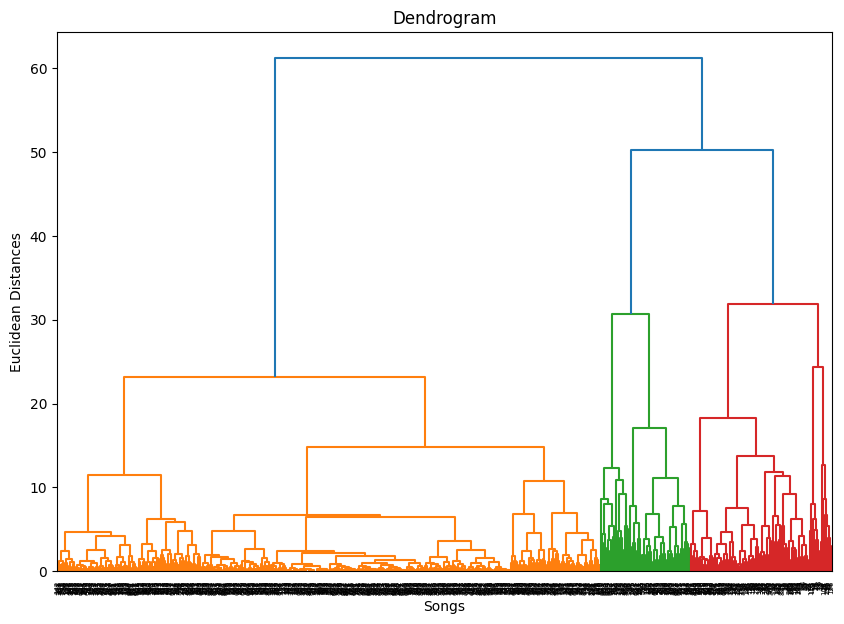

                      in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
hierarchical_cluster                                                                
0                                     4207                 37                  80   
1                                     2229                  5                  34   
2                                    21389                 16                 188   

                      in_apple_charts  in_deezer_playlists  in_deezer_charts  in_shazam_charts  \
hierarchical_cluster                                                                             
0                                  99                  186                11               227   
1                                  33                   66                 0                16   
2                                  75                 2401                 2                61   

                        streams  
hierarchical_cluster             
0              

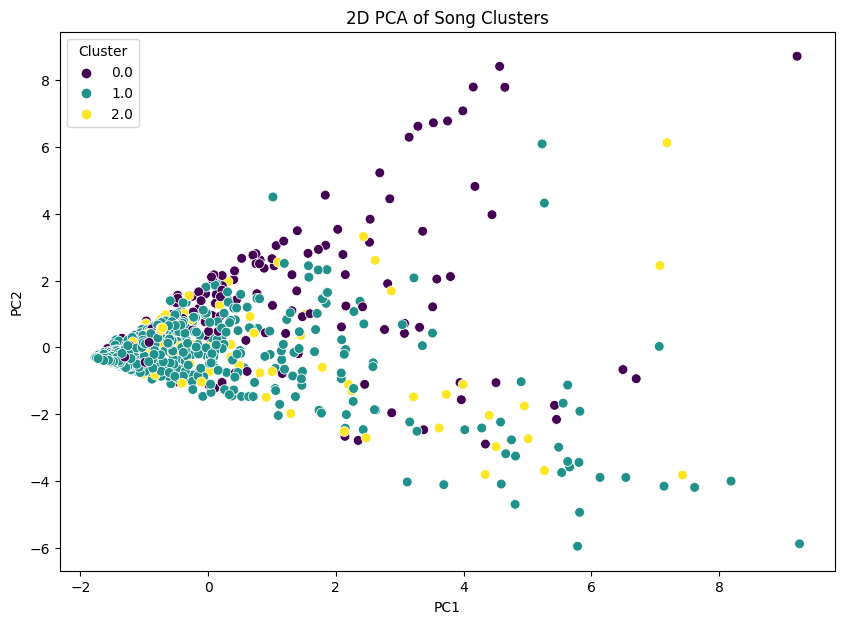

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and clean data
data = pd.read_csv('spotify-2023.csv',encoding='unicode_escape')
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data = data.dropna(subset=['streams'])
data['streams'] = data['streams'].astype(int)

# Features for clustering
features = [
    'in_spotify_playlists', 'in_spotify_charts',
    'in_apple_playlists', 'in_apple_charts',
    'in_deezer_playlists', 'in_deezer_charts',
    'in_shazam_charts', 'streams'
]

# Convert string columns to integer
data[features] = data[features].apply(lambda x: pd.to_numeric(x.astype(str)
                                                .str.replace(',',''), errors='coerce'))

# Handling NaN values after conversion
data = data.dropna(subset=features)

# Scaling the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Creating a Dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Songs')
plt.ylabel('Euclidean Distances')
plt.show()

# Applying Hierarchical Clustering
# (Choose n_clusters based on the dendrogram)
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
data['hierarchical_cluster'] = hc.fit_predict(data_scaled)

# Analyzing the Clusters
cluster_summary = data.groupby('hierarchical_cluster')[features].mean()
print(cluster_summary)

# Apply PCA and fit the features
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the cluster label obtained from hierarchical clustering to this DataFrame
pc_df['Cluster'] = data['hierarchical_cluster']

# Visualizing the 2D projection
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pc_df['PC1'], y=pc_df['PC2'], hue=pc_df['Cluster'], palette='viridis', s=50)
plt.title('2D PCA of Song Clusters')
plt.savefig('image162.png')
plt.show()

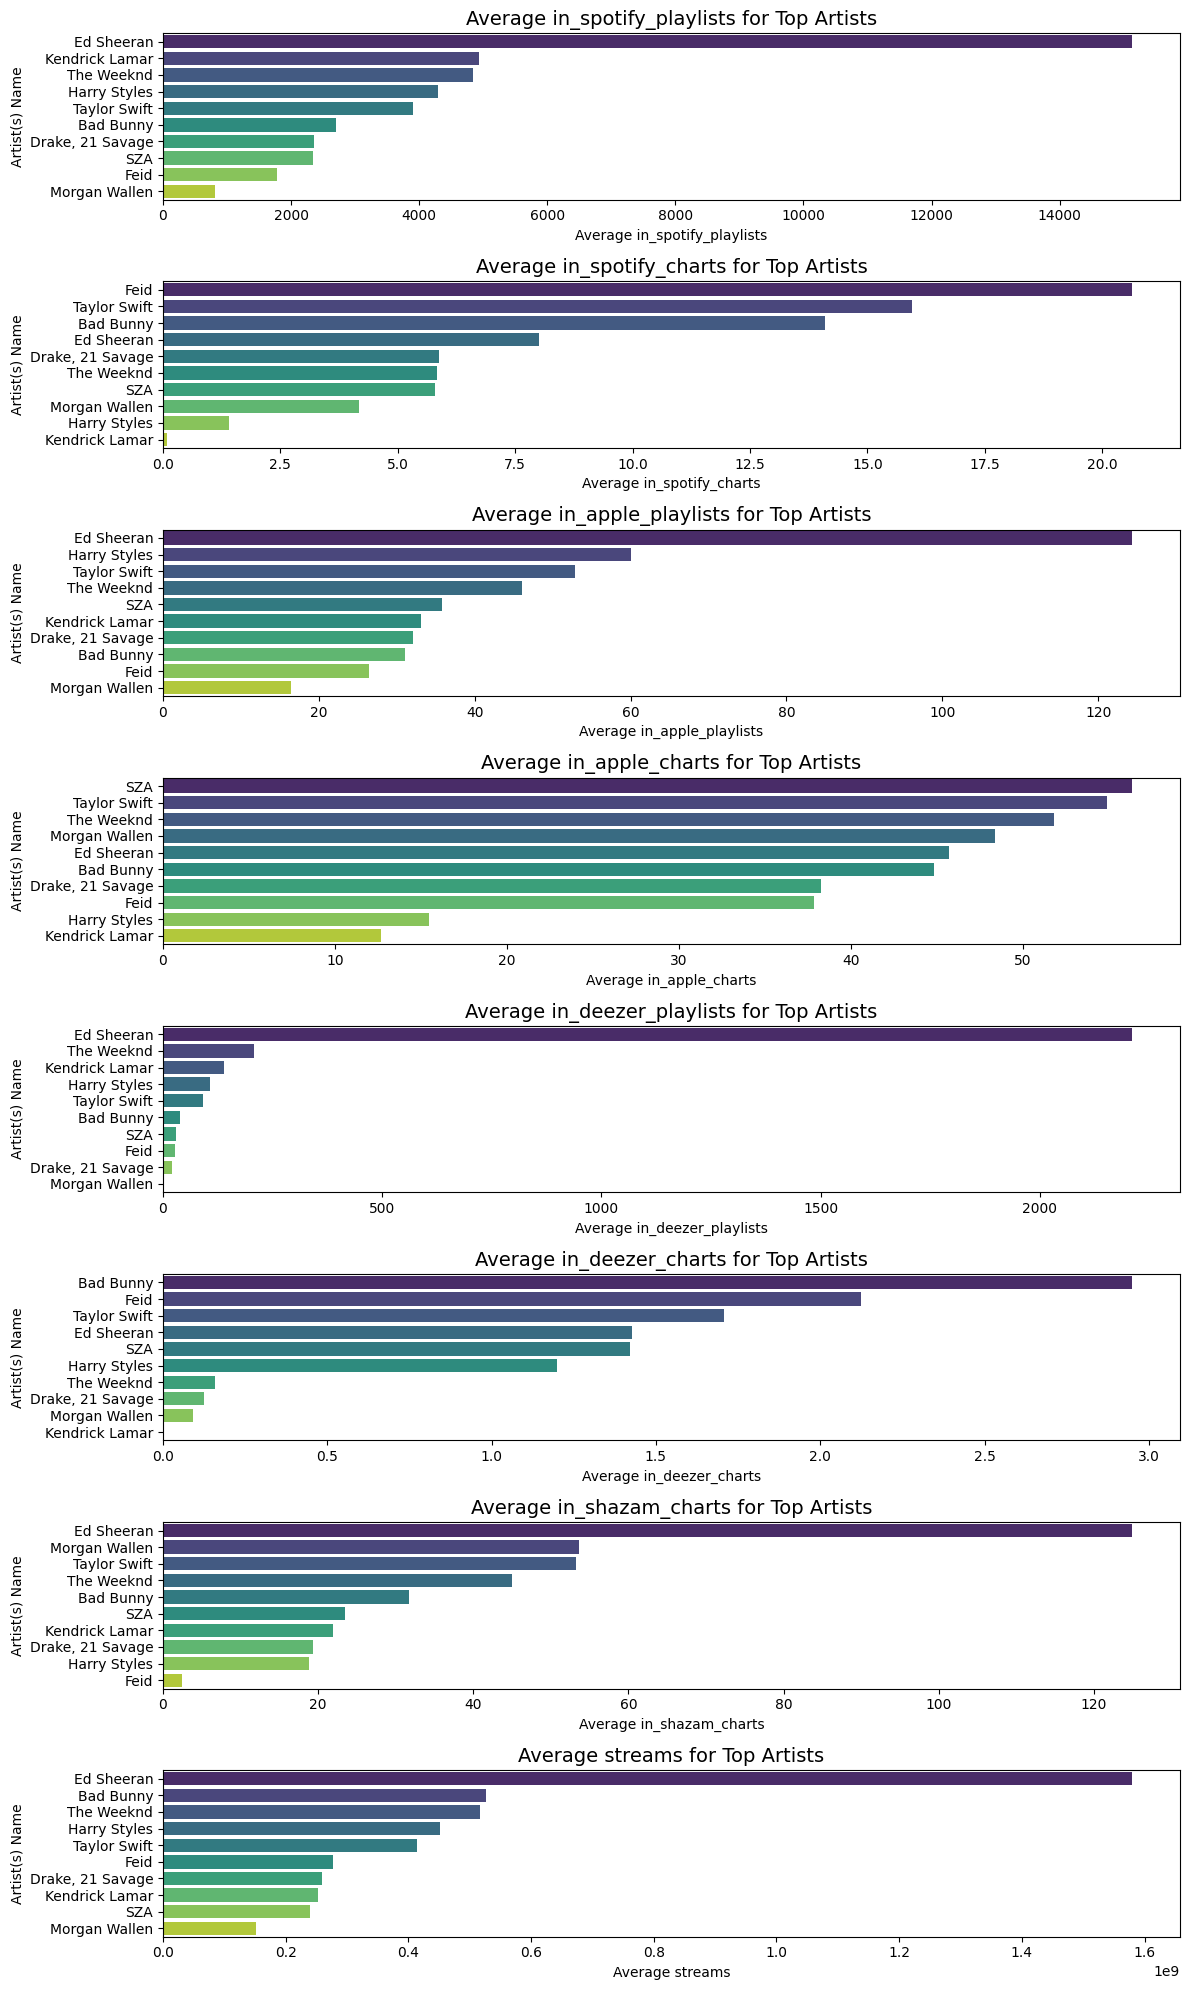

In [ ]:
# Selecting the top 10 artists based on the number of songs they have in the dataset
top_artists = data['artist(s)_name'].value_counts().head(10).index

# Filtering the dataset to include only these top artists
top_artists_data = data[data['artist(s)_name'].isin(top_artists)]

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=len(features), figsize=(12, 20))

# Plotting average values for each feature for the top artists
for i, feature in enumerate(features):
    artist_feature_avg = top_artists_data.groupby('artist(s)_name')[feature].mean().sort_values(ascending=False)
    sns.barplot(x=artist_feature_avg.values, y=artist_feature_avg.index, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Average {feature} for Top Artists', fontsize=14)
    axes[i].set_xlabel(f'Average {feature}')
    axes[i].set_ylabel('Artist(s) Name')

plt.tight_layout()
plt.savefig('image170.png')
plt.show()